# Building a Classifier for Chest X-Ray Images with Pytroch

In this project, we are building a classifier to determine if a given chest X-Ray image is normal or not. <br>
For this, we will use data set from Kaggle.  <br>
The Dataset contains 5,863 chest X-Ray Images in .jpeg format. There two categories, that are Pneumonia and Normal. For more details you can check [Kaggle.](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)




## Load the Dataset

In [5]:
import zipfile
import os

# Path to your local ZIP file
zip_path = "archive.zip"

# Folder to extract to (will be created if it doesn't exist)
data_path = "x_ray_data"

os.chdir('C:/Users/Gamer/Downloads')  

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

print("Files extracted to:", os.path.abspath(data_path))

Files extracted to: C:\Users\Gamer\Downloads\x_ray_data


In [7]:
print([name for name in os.listdir(data_path)])

['chest_xray']


In [9]:
data_path=data_path+'./chest_xray'

In [11]:
print([name for name in os.listdir(data_path)])

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [13]:
test_data_dir=data_path+'./test'
train_data_dir=data_path+'./train'
valid_data_dir=data_path+'./val'


In [15]:
print([name for name in os.listdir(test_data_dir)])

['NORMAL', 'PNEUMONIA']


Let us print the number of pictures in each class.

In [17]:
print('The number of normal images in test data:', len([name for name in os.listdir(test_data_dir+'./NORMAL') ]))
print('The number of pneumonia images in test data:', len([name for name in os.listdir(test_data_dir+'./PNEUMONIA') ]))

print('The number of normal images in train data:', len([name for name in os.listdir(train_data_dir+'./NORMAL') ]))
print('The number of pneumonia images in train data:', len([name for name in os.listdir(train_data_dir+'./PNEUMONIA') ]))

print('The number of normal images in valid data:', len([name for name in os.listdir(valid_data_dir+'./NORMAL') ]))
print('The number of pneumonia images in valid data:', len([name for name in os.listdir(valid_data_dir+'./PNEUMONIA') ]))


The number of normal images in test data: 234
The number of pneumonia images in test data: 390
The number of normal images in train data: 1341
The number of pneumonia images in train data: 3875
The number of normal images in valid data: 8
The number of pneumonia images in valid data: 8


To have more control over data, we can define our Dataset function. 

In [19]:
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class Xray_Dataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        self.classes = ['NORMAL', 'PNEUMONIA']
        self.image_paths = []
        self.labels = []
        
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for name in os.listdir(class_dir):
                if name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(class_dir, name))
                    self.labels.append(label)
                    
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)  #.convert("RGB") 
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


        return image, label


First define the transform then two dataset for training and validation. 

In [216]:
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  
])


In [218]:
train_dataset = Xray_Dataset(train_data_dir, transform=transform)
valid_dataset   = Xray_Dataset(valid_data_dir, transform=transform)

Let us set batch size to 32. <br> 
Note that to take 'shuffle=True' is efficient for trainnig but for validation data it is better to remain it False.

In [322]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader   = DataLoader(valid_dataset, batch_size=32)

We can see some samples from dataloader.

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [232]:
img=train_dataset[1][0]
img.shape

torch.Size([3, 224, 224])

Since the images are in the shape of (3,24,24), to plot the images we need to permute it. Because imshow method expects the image in (height, width, channels) format. But our image in (channels, height, weight) format.


In [234]:
img=img.permute(1,2,0)
img.shape

torch.Size([224, 224, 3])

Now it is in the right form to visualize.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


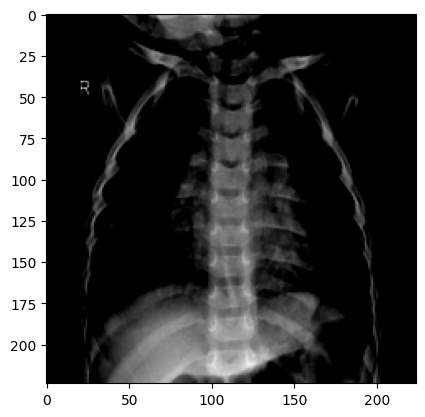

In [239]:
plt.imshow(img)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


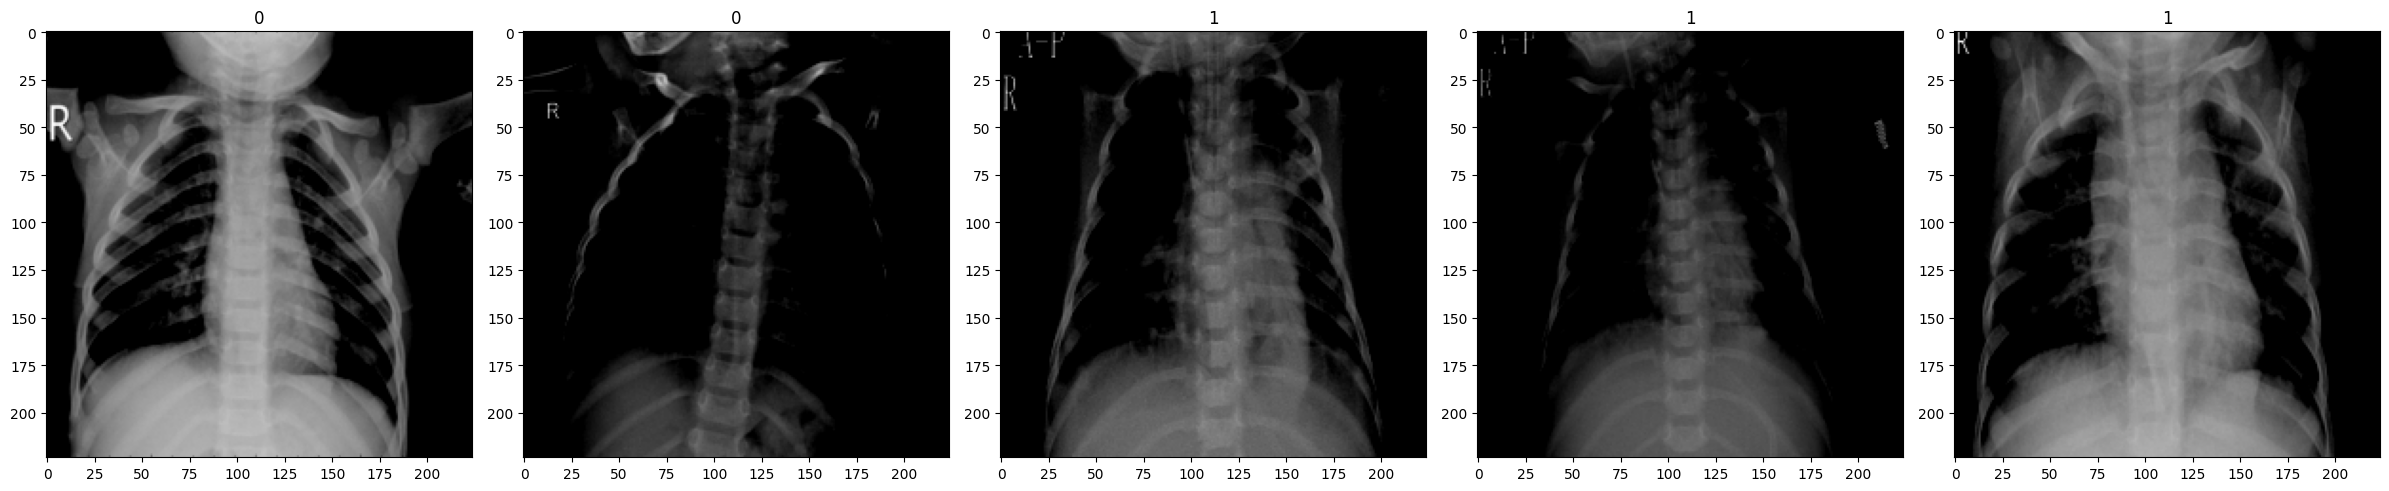

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


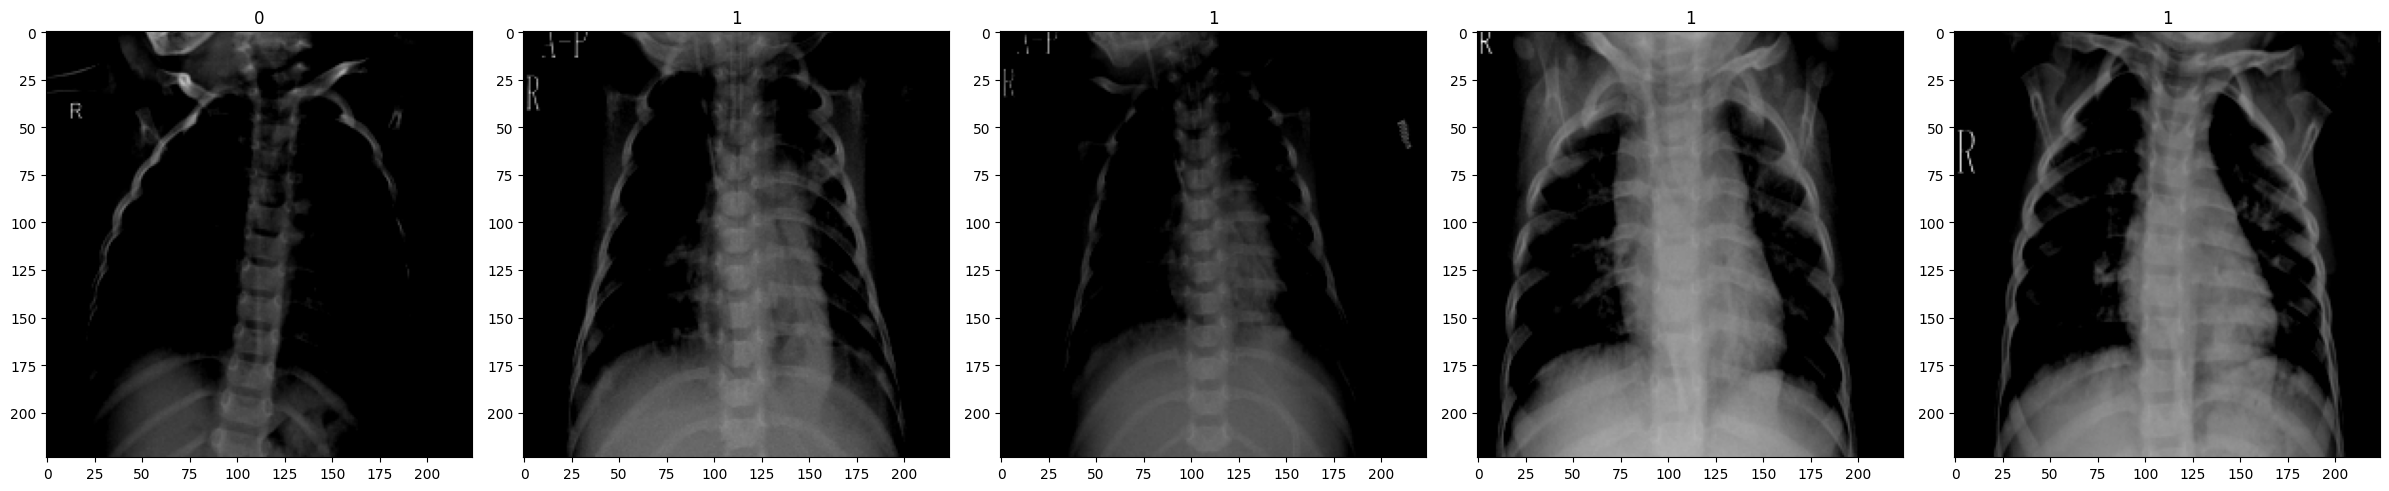

In [257]:
n=0
for i in range(2):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        plt.subplot(1, 5, j+1)
        img=valid_dataset[i+j+n+1][0]
        img=img.permute(1,2,0)
        plt.imshow(img.squeeze())
        plt.title(valid_dataset[i+j+n+1][1])
        n=5
        #print(os.path.abspath(train_dataset[i+j+n+1]))
        
    plt.tight_layout()
    plt.show()


## Prepare a Model

Now prepare a pre-trained resnet18 model.

In [324]:
import torchvision.models as models

Xray_model = models.resnet18(pretrained=True)

C:\Users\Gamer\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Gamer\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [326]:
Xray_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

We need to set the attribute requires_grad to False. Since we want to the parameters will not be affected by training.

In [328]:
for param in Xray_model.parameters():
    param.requires_grad = False

As we see above, last layer of resnet18 takes 512 inputs from previous hidden layer and gives 1000 outputs. This means it is used to classify 1000 different objects. <br>
But in this project we have two different classes.


To do this, we have to replace the output layer model.fc of the neural network with a nn.Linear object. For the parameters in_features  remember the last hidden layer has 512 neurons.

In [330]:
import torch.nn as nn
Xray_model.fc = nn.Linear(512,2)  

Check the model one more time.

In [332]:
Xray_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Now it is in right format.

## Training

Before training. first define optimizer and criterion.

In [334]:
criterion = nn.CrossEntropyLoss()

In [336]:
import torch
optimizer = torch.optim.Adam([parameters  for parameters in Xray_model.parameters() if parameters.requires_grad],lr=0.01)

In [338]:
import time # to calculate the training time
n_epochs=3
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(valid_dataset)
N_train=len(train_dataset)
#time_start = time.time()


Loss=0
time_start = time.time()
for epoch in range(n_epochs):
    for x, y in train_loader:

        #set model to train
        Xray_model.train() 
        # set gradient to zero
        optimizer.zero_grad()
     
        #predictions
        z=Xray_model(x)
   
        # calculation of loss 
        loss=criterion(z,y)
        #add to list
        loss_list.append(loss.item())
    
        # calculate gradients of parameters 
        loss.backward()
        # update parameters
        optimizer.step()
        
    correct=0
    for x_test, y_test in valid_loader:
       
        # set model to eval 
        Xray_model.eval()
       
        #prediction
        z=Xray_model(x_test)
        #find max value to determone predicted class
        _,yhat=torch.max(z.data, 1)
       
       
        # misclassified  samples in mini-batch 
        correct+=(yhat==y_test).sum().item()
   
    #calculate accuracy
    accuracy=correct/N_test
    #add to list
    accuracy_list.append(accuracy)

time_current=time.time()
time_total=time_current-time_start
print('total time:', time_total, 'Accuracy:', accuracy)



total time: 1457.9946372509003 Accuracy: 0.75


In [339]:
accuracy

0.75

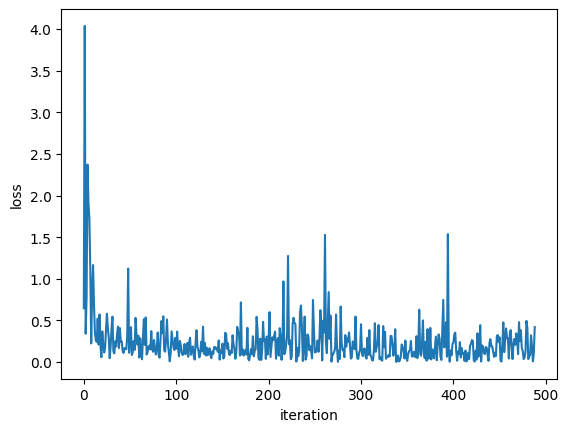

In [340]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


As it is shown, the loss decreases over time, the result is not good enough. Changing some parameters may help to reach a better accuracy.

## Hyperparameter Tuning

To determine which parameters should we use for best result, we will do hyperparameter tunning by grid search.

In [362]:
import copy
from tqdm import tqdm

#Hyperparameters
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]
num_epochs = 5
patience = 2 # after 3 epoch if loss is not decrease then early stopping accures

# Tracking part
best_acc = 0.0
best_params = {}

loss_best=[]
acc_best=[]

# Grid Search
for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nTraining with LR={lr}, Batch Size={batch_size}")
        #define the dataloader for specified batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) #shuffle the data only for training 
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

        loss_list=[]
        acc_list=[]

        model = models.resnet18(pretrained=True) # load the model
        model.fc = nn.Linear(model.fc.in_features, 2)  # change the last layer for Binary classification
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #if GPU is avaliable change the device
        model = model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer =torch.optim.Adam(model.parameters(), lr=lr)

        best_val_loss = float("inf")
        epochs_no_improve = 0 #control the number of epochs without improvement
        best_model_wts = copy.deepcopy(model.state_dict())

        for epoch in range(num_epochs):
            #training phase
            model.train()
            running_loss = 0.0
            for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                images, labels = images.to(device), labels.to(device)
                
                #clear optimizer
                optimizer.zero_grad()
                outputs = model(images)
                #calculate loss
                loss = criterion(outputs, labels)
                loss.backward()
                #
                optimizer.step()
                running_loss += loss.item()
                loss_list.append(loss.item())

            # Validation phase
            model.eval()
            val_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    correct += (preds == labels).sum().item()
                    total += labels.size(0)

            val_loss /= len(valid_loader)
            val_acc = correct / total
            acc_list.append(val_acc)
            print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

            # Check early stopping condition
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                loss_best=loss_list
                acc_best=acc_list
                best_model_wts = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    print("Early stopping triggered.")
                    break

        if val_acc > best_acc:
            best_acc = val_acc
            best_params = {"learning_rate": lr, "batch_size": batch_size}
            torch.save(best_model_wts, "best_model.pth")

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Validation Accuracy: {best_acc:.4f}")



Training with LR=0.001, Batch Size=16


C:\Users\Gamer\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Gamer\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/5: 100%|██████████| 326/326 [16:06<00:00,  2.97s/it]


Validation Loss: 0.2339, Accuracy: 0.8750


Epoch 2/5: 100%|██████████| 326/326 [16:18<00:00,  3.00s/it]


Validation Loss: 0.2150, Accuracy: 0.8750


Epoch 3/5: 100%|██████████| 326/326 [16:09<00:00,  2.97s/it]


Validation Loss: 0.4975, Accuracy: 0.8750


Epoch 4/5: 100%|██████████| 326/326 [16:02<00:00,  2.95s/it]


Validation Loss: 0.0386, Accuracy: 1.0000


Epoch 5/5: 100%|██████████| 326/326 [15:54<00:00,  2.93s/it]


Validation Loss: 0.0656, Accuracy: 1.0000

Training with LR=0.001, Batch Size=32


Epoch 1/5: 100%|██████████| 163/163 [16:00<00:00,  5.90s/it]


Validation Loss: 0.2870, Accuracy: 0.8125


Epoch 2/5: 100%|██████████| 163/163 [15:53<00:00,  5.85s/it]


Validation Loss: 2.6006, Accuracy: 0.5625


Epoch 3/5: 100%|██████████| 163/163 [15:59<00:00,  5.88s/it]


Validation Loss: 0.3425, Accuracy: 0.8750
Early stopping triggered.

Training with LR=0.0001, Batch Size=16


Epoch 1/5: 100%|██████████| 326/326 [16:00<00:00,  2.95s/it]


Validation Loss: 0.2888, Accuracy: 0.8750


Epoch 2/5: 100%|██████████| 326/326 [15:58<00:00,  2.94s/it]


Validation Loss: 0.1773, Accuracy: 0.9375


Epoch 3/5: 100%|██████████| 326/326 [15:55<00:00,  2.93s/it]


Validation Loss: 0.2100, Accuracy: 0.9375


Epoch 4/5: 100%|██████████| 326/326 [15:56<00:00,  2.93s/it]


Validation Loss: 0.0207, Accuracy: 1.0000


Epoch 5/5: 100%|██████████| 326/326 [15:59<00:00,  2.94s/it]


Validation Loss: 0.4609, Accuracy: 0.8125

Training with LR=0.0001, Batch Size=32


Epoch 1/5: 100%|██████████| 163/163 [15:41<00:00,  5.78s/it]


Validation Loss: 0.1548, Accuracy: 0.9375


Epoch 2/5: 100%|██████████| 163/163 [15:59<00:00,  5.89s/it]


Validation Loss: 0.1100, Accuracy: 0.9375


Epoch 3/5: 100%|██████████| 163/163 [15:46<00:00,  5.81s/it]


Validation Loss: 0.5483, Accuracy: 0.7500


Epoch 4/5: 100%|██████████| 163/163 [15:43<00:00,  5.79s/it]


Validation Loss: 0.0878, Accuracy: 0.9375


Epoch 5/5: 100%|██████████| 163/163 [15:43<00:00,  5.79s/it]


Validation Loss: 0.0219, Accuracy: 1.0000

Best Hyperparameters:
{'learning_rate': 0.001, 'batch_size': 16}
Best Validation Accuracy: 1.0000


In [364]:
acc_best

[0.9375, 0.9375, 0.75, 0.9375, 1.0]

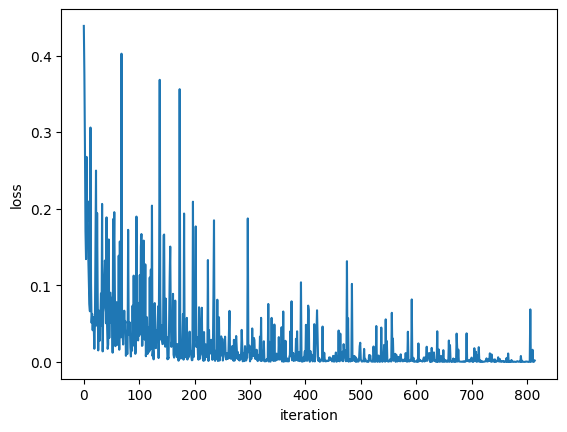

In [366]:
plt.plot(loss_best)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

As we see, best parameters are lr=0.001 and batch_size=16 where number of epochs is 5. Then accuracy reach 1 on validation data and loss decreases to 0.006.}

## Prediction on Test Data

In [373]:
import tensorflow as tf

Now make a prediction on test data. That shows models accuracy on unseen data.

First define test loader.

In [379]:
test_dataset = Xray_Dataset(test_data_dir, transform=transform)
test_loader=DataLoader(test_dataset, batch_size=16)

Load the best model and set it on evaluation mode.

In [388]:
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Make a prediction on test data and calculate the accuracy.

In [395]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader): 
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

100%|██████████| 39/39 [00:53<00:00,  1.37s/it]

Test Accuracy: 0.8285


Accuracy of our model on test data is 0.82.